# Insights into Forest Fires

## Basic Models

## Loading libraries

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# importing keras libraries
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor

import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Working with the dataset

### Loading the dataset

The dataset can be downloaded from: https://www.kaggle.com/elikplim/forest-fires-data-set

The attributes in the dataset include:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec"
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [2]:
forest_fires = pd.read_csv('/home/ryan/Learning-Forest-Fires/forest_fires.csv')
forest_fires.head(4)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0


### Converting the labels under month and day to integers

In [3]:
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [4]:
x_values = list(forest_fires['X'])
y_values = list(forest_fires['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [5]:
month_values = list(forest_fires['month'])
day_values = list(forest_fires['day'])

ffmc_values = list(forest_fires['FFMC'])
dmc_values = list(forest_fires['DMC'])
dc_values = list(forest_fires['DC'])
isi_values = list(forest_fires['ISI'])

temp_values = list(forest_fires['temp'])
rh_values = list(forest_fires['RH'])
wind_values = list(forest_fires['wind'])
rain_values = list(forest_fires['rain'])

area_values = list(forest_fires['area'])

In [6]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

### Counting the instances of location points in dataset

In [7]:
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

In [8]:
total_count = 0
positive_data_count = 0

for value in area_values:
    if(value > 0):
        positive_data_count = positive_data_count + 1
    total_count = total_count + 1

print("The number of data records with 'burned area' > 0 are " + str(positive_data_count) + " and the total number of records are " + str(total_count) + ".")
print("The percentage value is " + str(positive_data_count/total_count * 100) + ".")

The number of data records with 'burned area' > 0 are 270 and the total number of records are 517.
The percentage value is 52.22437137330754.


## Gaining insights with learning models

### Spilliting the available data/Setting the initial parameters

In [9]:
train_x, test_x, train_y, test_y = train_test_split(attribute_list, area_values, test_size=0.3, random_state = 9)
mse_values = []
variance_score = []

### Printing the actual vs predicted values

In [10]:
def print_values(test, predicted):
    print("The actual output and the predicted output are:")
    
    for value in range(0, len(predicted_y)):
        print('%.4f' % test_y[value], " ", '%.4f' % predicted_y[value])

### Linear regression model

In [11]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 1.71747529  2.62534697  1.19534284  1.42643221 -0.2411676   0.08588672
 -0.01211609 -0.35961031  0.62442967 -0.44664769  1.74511285 -1.58498463]

Mean squared error:  1913.2639647759795
Variance score: -0.04


### Bagging Regressor Model

In [12]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
regr = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(train_x,train_y )
predicted_y = regr.predict(test_x)
print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))
mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))


Mean squared error:  2049.4190961558875
Variance score: -0.12


### ELASTICNET REGGRESSION MODEL

In [13]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(random_state=0)
elasticnet.fit(train_x,train_y)
predicted_y = elasticnet.predict(test_x)
print('\n Coefficeints :', elasticnet.coef_)
print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))
mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))


 Coefficeints : [ 1.69106821  1.73731342  0.69532242  1.20042163 -0.22386208  0.08597898
 -0.00817259 -0.27236354  0.48488668 -0.46061712  1.29953134 -0.        ]

Mean squared error:  1896.8391125619116
Variance score: -0.04


### ExtraTree Regression Model

In [14]:
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
extra_tree.fit(train_x,train_y)
predicted_y = extra_tree.predict(test_x)
print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))
mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))



Mean squared error:  9132.215044230767
Variance score: -3.99


### KNN Regression Model

In [15]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(train_x, train_y)
predicted_y = neigh.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))



Mean squared error:  4499.09367852564
Variance score: -1.46


### Decision tree model

In [16]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2182.122069871795
Variance score: -0.19


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


### MLP model

In [17]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,50,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")

mlp.fit(train_x, train_y)
predicted_y = mlp.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1830.3243087914866
Variance score: 0.00


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### SVM model

In [18]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2049.8681225338964
Variance score: -0.12


### Random forest model

In [19]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2158.3922835916032
Variance score: -0.18


### Bayesian ridge model

In [20]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(train_x, train_y)
predicted_y = bayesian_ridge.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1841.3430300494888
Variance score: -0.01


### Lasso model

In [21]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1904.4049878441558
Variance score: -0.04


### Function for generating the graph

In [22]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(8, 6))
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

### Mean squared error graph

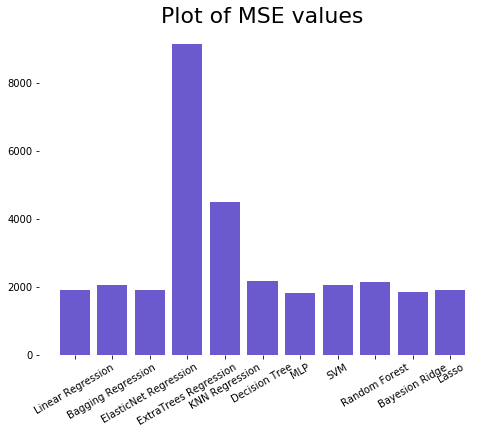

In [23]:
ticks = ["Linear Regression",'Bagging Regression','ElasticNet Regression','ExtraTrees Regression','KNN Regression', "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesion Ridge", "Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

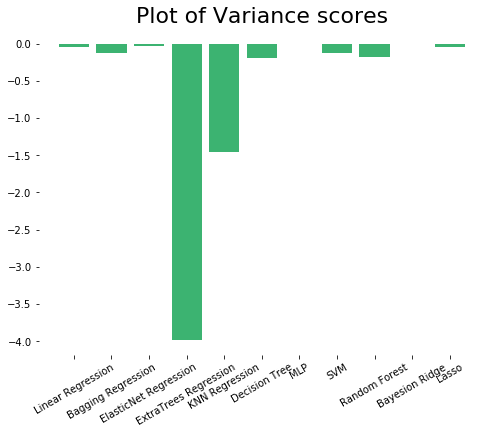

In [25]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)